### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [5]:
# your code and solutions
import pandas as pd

data = pd.read_csv('/content/sample_data/The E-commerce Dataset.csv')
data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [6]:
count_null = data.isnull().sum()
count_null

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [7]:
numBefore = len(data)
numBefore

20000

In [8]:
test = data.dropna(subset =['rating', 'helpfulness', 'gender'])
data_clean = test.loc[test['review'] != 'none']
len(data_clean)

19916

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [10]:
# Question 2.1
#total number of unique users
s = pd.value_counts(data_clean.userId)
uniquea_values = s.index.tolist()
print("unique users:", len(uniquea_values))

s = pd.value_counts(data_clean.review)
uniqueRe = s.index.tolist()
print("unique review:", len(uniqueRe))

s = pd.value_counts(data_clean.item)
uniqueI = s.index.tolist()
print("unique item:", len(uniqueI))

s = pd.value_counts(data_clean.category)
uniqueCa = s.index.tolist()
print("unique category:", len(uniqueCa))

unique users: 8562
unique review: 19459
unique item: 89
unique category: 9


In [11]:
# Question 2.2
# descriptive statistics, e.g., the total number, mean,
# std, min and max regarding all rating records
summary = data.rating.describe()
summary

count    19983.000000
mean         3.701847
std          1.404619
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [13]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of
# the number of items rated by different genders
male = data_clean[data_clean.gender == 'M' ]
summary_male = male.rating.describe()
summary_male

count    10123.000000
mean         3.686654
std          1.413098
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [14]:
female = data_clean[data_clean.gender == 'F' ]
summary_female = female.rating.describe()
summary_female

count    9793.000000
mean        3.717451
std         1.395355
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [ ]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min
# of the number of ratings that received by each items
for x in data_clean['item_id'].unique():
  # The .iloc[0] is used to select the first item name in case there are multiple rows with the same item ID.
  item_name = data_clean[data_clean['item_id'] == x]['item'].iloc[0]
  print('itemID:', x)
  print('Item Name:', item_name)
  print((data_clean.rating[data_clean['item_id']== x]).describe(), '\n')

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

[Text(0.5, 1.0, 'Rating by Gender')]

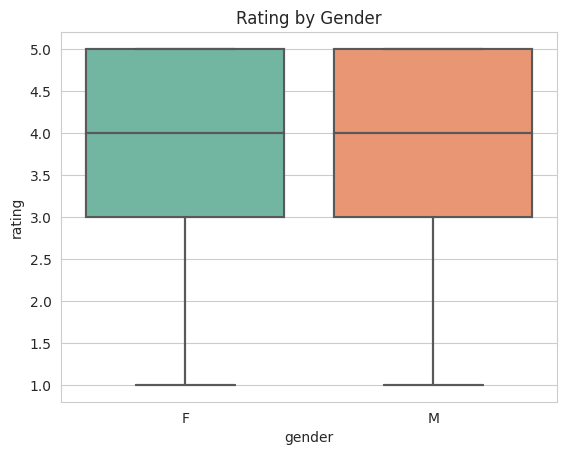

In [27]:
# your code and solutions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_style("whitegrid")

sb.boxplot([female['rating'], male['rating']])
sb.boxplot(x= 'gender', y= 'rating', data = data_clean, palette= 'Set2').set(title = 'Rating by Gender')

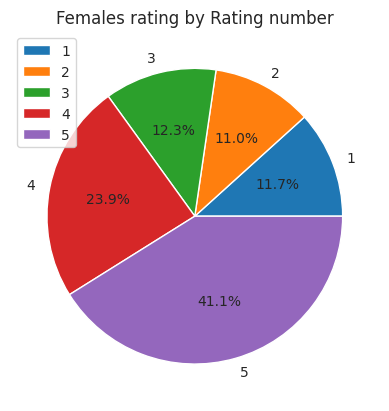

In [73]:
# frequency of female's rating
# count the number of each rating score in males
freFe = [len(female[female['rating'] ==1]), len(female[female['rating'] ==2]),
       len(female[female['rating'] ==3]), len(female[female['rating'] ==4]), len(female[female['rating'] ==5])]
plt.pie(freFe, labels = [1, 2, 3, 4, 5], autopct='%1.1f%%')
plt.title('Females rating by Rating number')
plt.legend()

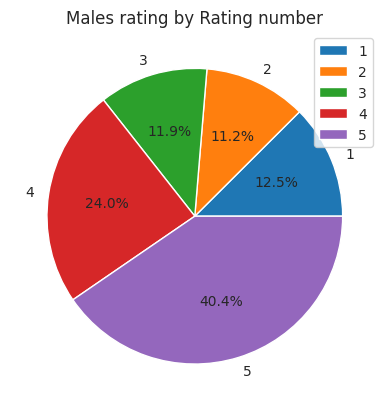

In [90]:
# count the number of each rating score in males
freMale = [len(male[male['rating'] ==1]), len(male[male['rating'] ==2]),
       len(male[male['rating'] ==3]), len(male[male['rating'] ==4]), len(male[male['rating'] ==5])]
plt.pie(freMale, labels = [1, 2, 3, 4, 5], autopct='%1.1f%%')
plt.title('Males rating by Rating number')
plt.legend()

**Gender affects on rating**

Examining the pie charts and box plot illustrating the distribution of ratings among males and females, it is evident that there are no substantial disparities in the assessment scores between the two genders. The box plot reveals that both males and females share identical highest (rating of 5), lowest (rating of 1), and median (rating of 4) scores. However, when considering question 2.3, it becomes apparent that women assigned slightly higher ratings compared to men, with women averaging at 3.72 and men at 3.69. Additional evidence supporting this observation can be found in the distribution pie charts for each gender's ratings. Notably, females tend to allocate higher ratings (3 and above), while males tend to provide more moderate ratings, particularly around 4 or lower, particularly 1.

This suggests that gender does not have a significant impact on the overall ratings, but it is evident that women tend to give higher ratings than men.

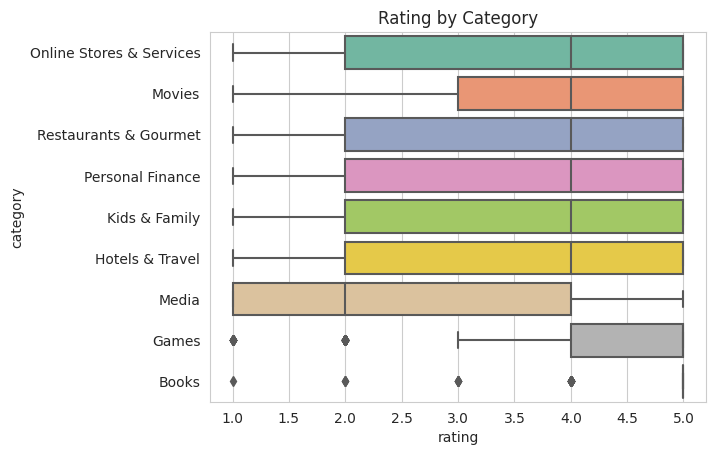

In [28]:
plot = sb.boxplot(x = data_clean['rating'], y= data_clean['category'], palette = 'Set2').set(title = 'Rating by Category')

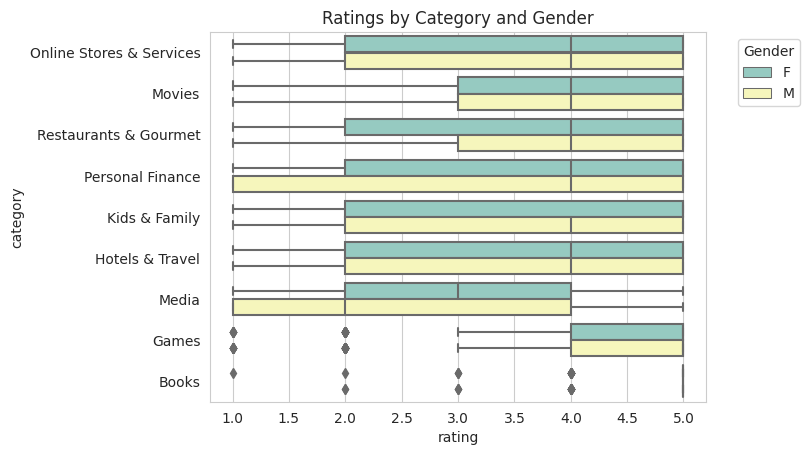

In [89]:
sb.boxplot(x='rating', y='category', hue='gender', data=data_clean, palette='Set3').set(title= 'Ratings by Category and Gender')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')


**Effects of categories on rating scores**

The box plot illustrates the distribution of ratings across various categories, including online services, restaurants, personal finance, family-related topics, travel, and movies. The majority of these categories (online services, restaurants, personal finance, family-related topics, and travel) exhibit similar rating spreads, characterized by a minimum of 1, a maximum of 5, and a median at 4. However, the "movies" category deviates from this pattern, displaying a narrower spread of values, indicative of higher average ratings compared to the other categories.

Analyzing the rating distribution across categories and gender using the box plot, differences become apparent in how gender impacts category-specific ratings. In the case of "restaurants," women seem more inclined to engage in feedback and express their opinions candidly, as reflected in the broader spread of ratings spanning from 2 to 5. Conversely, men appear more interested in the "personal finance" and "media" categories, particularly the financial domain where ratings span evenly from 1 to 5. In the "media" category, men exhibit a lower median value compared to females. This difference could be attributed to varying frequencies of media consumption for entertainment purposes.

In conclusion, the category indeed influences rating scores, particularly notable in the case of "movies," "games," and "books," which have distinct patterns compared to other categories.

[Text(0.5, 1.0, 'Helpfulness by Rating')]

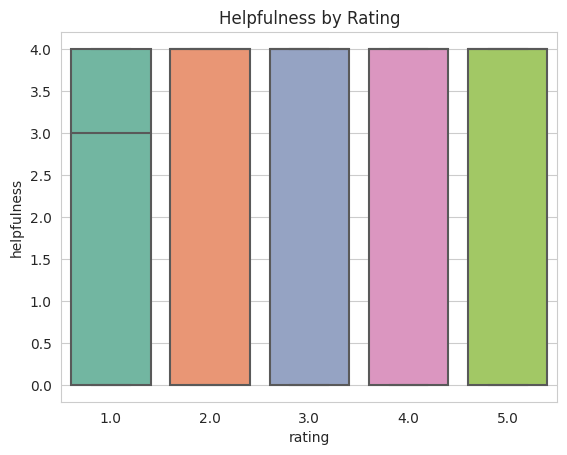

In [103]:
sb.boxplot(x= 'rating',y = 'helpfulness', data= data_clean, palette = 'Set2').set(title = 'Helpfulness by Rating')

**There is no relationship between helpfulness and rating**

As depicted in the provided box plot, a clear observation can be made that there is no discernible correlation between helpfulness scores and rating scores. Across all ranges of rating scores, the distribution of helpfulness scores shows no consistent trend, with both minimum and maximum scores spanning the entire range. This lack of a direct relationship can be attributed to the fact that helpfulness is influenced by factors beyond just the rating score itself.

Indeed, the level of helpfulness is contingent not solely upon the rating given but also takes into account other contextual elements. These factors encompass the content of the review, the relevance of the review to the specific product or category, and the individual needs of potential customers seeking assistance or insight. In essence, the relationship between helpfulness and rating is multifaceted, involving a broader spectrum of considerations beyond the numeric rating assigned to a product or service.

**Data overal summary**

In general, the dataset encompasses a sufficiently substantial size, even though a few initial missing data points do not significantly impede the visualization and analysis process. Following the compilation of statistical summaries and visualizations, several conclusions can be drawn. Notably, gender does indeed exert an influence on ratings, particularly within certain categories. Concurrently, it becomes evident that there exists no direct correlation between the helpfulness of reviews and the assigned rating scores. This discrepancy can be attributed to the multifaceted nature of helpfulness, which hinges on diverse factors encompassing the content of the review, the specific category or item under scrutiny, and individual preferences.

In essence, the combined insights from statistical analysis and visual representation underscore the complexity of the interplay between gender, ratings, and helpfulness. These findings affirm the significance of a holistic perspective that considers a spectrum of contributing factors when interpreting and deriving insights from such data.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [ ]:
# your code and solutions
#reviews of which the helpfulness is no more than 2
data1 = data_clean[data_clean['helpfulness'] > 2]

# users who rate less than 7 items
user_ratings_count = data1.groupby('userId')['rating'].count()
condition = user_ratings_count[user_ratings_count >= 7].index

data2 = data1[data1['userId'].isin(condition)]


# items that receives less than 11 ratings
item_rating_count = data2.groupby('item_id')['rating'].count()
item_condi = item_rating_count[item_rating_count >= 11].index
data_final = data2[data2['item_id'].isin(item_condi)]

len(data_final)




2685